In [108]:
%%html
<a href="https://colab.research.google.com/drive/1cH0SYh3-nS9JJCCuYHMHkHuZUBgvLQt4#scrollTo=WqCuHZHdaCXf">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# TV advertising Regression

This dataset is analyze the relationship between " TV advertising " and " Sales " using a simple linear regression.

I choose this dataset because I want to picdict sales based on the money spent on TV for marketing.

There we will build a linear regression model to predict Sales using a predictor variable.

I expect it will be more than 70% in r_squared

# Import

In [113]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


# Loading the Dataset

In [114]:
#Load the dataset I have selected using pandas
file = pd.read_csv("../assignment3/tvmarketing.csv")

We will work on both the TV and Sales columns.

TV columns = advertising.

In [115]:
#print the head of the cvs file
file.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [116]:
#200 rows and 2 columns
file.shape

(200, 2)

# Cleaning data

In [117]:
#Clean the data if needed using pandas
#checking null!
file.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         TV  Sales
0    False  False
1    False  False
2    False  False
3    False  False
4    False  False
..     ...    ...
195  False  False
196  False  False
197  False  False
198  False  False
199  False  False

[200 rows x 2 columns]>

# Distributions

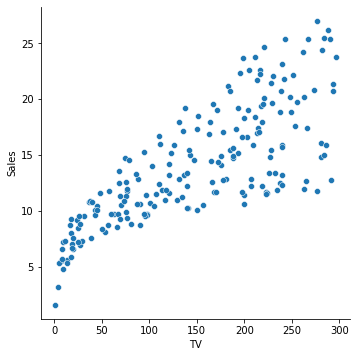

In [118]:
#Sales are related with TV using scatter plot
sns.pairplot(file, x_vars=['TV'], y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()


Equation of linear regression in my case is:
y = c + m1 * TV

In [119]:
#assign the feature variable to the variable X and Sales to variable Y
X = file['TV']
Y = file['Sales']

# Split Train and Test Set

Split your cleaned dataset using sklearn into a training and test set

In [120]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [121]:
#train dataset
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [122]:
Y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

# Feature Scaling

In [123]:
import statsmodels.api as sm

In [124]:
#to get an intercept
X_train_sm = sm.add_constant(X_train)

# Regreesion Models

In [125]:
#Fit the resgression line
lr = sm.OLS(Y_train, X_train_sm).fit()

In [126]:
#print the parameters
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [127]:
print(lr.summary())
# CoeTv is 0.465
# R - squared is 0.613

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 12 May 2021   Prob (F-statistic):           2.84e-30
Time:                        22:31:47   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

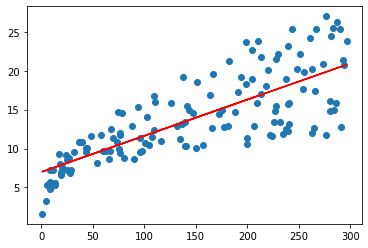

In [128]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.989 + 0.0465 * X_train, 'r')
plt.show()

Equation becomes:
Sales = 6.989(const coef) + 0.0465(tv coef) * TV

Fit a linear regression to your training set

Visualize the regressor using matplotlib

In [129]:
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)

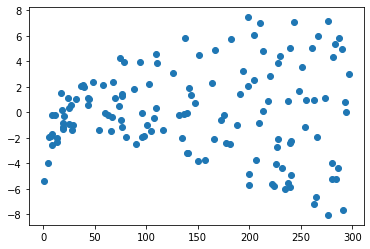

In [130]:
plt.scatter(X_train,res)
plt.show()

Prediction on the Test set

In [131]:
#add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [132]:
# Predict the Y corresponding to X_test_sm
Y_pred = lr.predict(X_test_sm)

In [133]:
Y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Error Rate

Report on the error rate for your test set

In [135]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

2.824145628832702

In [136]:
#R-squared on the test set
r_squared = r2_score(Y_test, Y_pred)
r_squared

0.5942987267783297

Comment on the result of this regression. Did it work well or not? Provide justification why or why not.

This is not working well because the R-aquared only have 59.4%, not as much as I expected.

# Conclusion

I am using the tv advertising dataset to find out how many advertising can drive to sales. After that, I use the Regression to fit into the date and find out the accuracy score and error rate with the test and prediction. I found out the data is not as my expectation. I only got 0.59 for R_squared. I think the next thing I have to do is to improve the Regression way I did. It can be more accuracy.